In [18]:
import pandas as pd
import sklearn
import numpy as np
import scipy 
from os import listdir
from os.path import isfile, join
import json
import glob
import nltk
import gensim
from gensim.models.phrases import Phrases, Phraser
from sklearn.model_selection import train_test_split
# from matplotlib import plot
mypath = "/Users/admin/Desktop/phd/CS-685-project/"
dataDir = mypath+"/data/"
allFiles = [f for f in listdir(dataDir) if isfile(join(dataDir, f))]
allFiles = [f for f in allFiles if "json" in f]

# allFiles = ['complaints_2020-10-08_fixed.json']
print(allFiles)
reports = []

for fi in allFiles:
    print(fi)
    for file in glob.glob(dataDir+fi):
        for line in open(file, "r"):
            #print(line[179])
#             print(line)
            city = file.split(".")[0].split("_")
            city = city[len(city)-1]
            obj = json.loads(line)
            obj["city"] = city.lower()
            reports.append(obj)


import pandas as pd
df = pd.DataFrame(reports)
df

['complaints_Delhi.json', 'complaints_Odisha.json', 'complaints_Bangalore.json', 'complaints_2020-10-08_fixed_bangalore.json', 'complaints_Mumbai.json']
complaints_Delhi.json
complaints_Odisha.json
complaints_Bangalore.json
complaints_2020-10-08_fixed_bangalore.json
complaints_Mumbai.json


,id,description,location,image_url,postedOn,category,subCategory,myCategory,page,city
0,1943280,"Z6-W61,SHIVA HOMES,A-sahu mangalam bhawan ke b...","E-111, Om Vihar Extn, Param Puri, Uttam Nagar,...",[],2020-12-02 T12:06:57,Animal Catcher,Dog,Dog,1,delhi
1,1922159,Sanitization is not here,"Sanjay Amar Colony, Vishwas Nagar, Shahdara, D...",[],2020-11-29 T13:06:58,Toilet My Right,No Water Supply In Public Toilet(s),No Water Supply In Public Toilet(s),1,delhi
2,1852336,"Z1-W41,Ram nagar nahar Kinare M. 9479010167","Shop No.AB-399, Amar Puri, Nabi karim, Paharga...",[],2020-11-18 T13:06:58,Solid Waste Management,Collection And Removal Of Garbage,Collection And Removal Of Garbage,1,delhi
3,1790436,"Z1,w60,AKANSHA KUNJ,A-Shiv mandir pas,h.no. 21...","B5 Rd, Pocket 14, Sector 9, Rohini, Delhi, 110085",[],2020-11-02 T13:06:58,Others,Other Services,Other Services,1,delhi
4,1788056,Z3 w34 aanand nagar A-fokat para sai mandir ke...,Raja tala,[],2020-11-02 T13:06:58,Solid Waste Management,Cleaning Of Drain,Cleaning Of Drain,1,delhi
...,...,...,...,...,...,...,...,...,...,...
46003,451071,"कांजूरमार्ग, भांडूप और मुलुंड मे जो मेट्रो का ...","Kanjurmarg West, Bhandup West, Mumbai, Maharas...",[],2019-12-03 T13:00:35,"Mobility - Roads, Footpaths and Infrastructure",Construction of new footpaths,Construction of new footpaths,14,mumbai
46004,448830,"Despite being a MHADA building, there is no wa...","Marathon Mhada, Dainik Shivneri Road, Ganapatr...",[],2019-12-03 T13:00:35,Garbage and Unsanitary Practices,Implementation Of Waste Segregation/Garbage,Implementation Of Waste Segregation/Garbage,14,mumbai
46005,448707,Broken Footpath full of debris near hiranandan...,"10-A, Orchard Ave, Hiranandani Gardens, Powai,...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2019-12-03 T13:00:39,"Mobility - Roads, Footpaths and Infrastructure",Construction of new footpaths,Construction of new footpaths,14,mumbai
46006,448255,Near by two tanks police station there is nawa...,"130, Ms Ali Road, Ajmer, Kumbharwada, Mumbai, ...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2019-12-03 T13:00:40,Animal Husbandry,Stray Dog Sterilisation/Animal Birth Control (...,Stray Dog Sterilisation/Animal Birth Control (...,14,mumbai


In [19]:
df['month'] = df['postedOn'].str[:7]
cm = pd.crosstab(index=df['city'], columns=df['month'])
#cm = cm.T
cm

month,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
city,,,,,,,,,,,,,,,
bangalore,22383,6470,4249,3974,4478,1685,433,145,267,201,167,398,110,516,19
delhi,0,0,169,10,18,15,26,16,7,8,9,8,1,5,1
mumbai,0,0,122,6,5,12,15,5,3,6,1,8,4,16,0
odisha,0,0,3,2,1,1,0,3,2,2,0,0,1,2,0


In [20]:
area = {"bangalore":709,
        "delhi":1484,
        "mumbai":603,
        "odisha":155707
       }


In [21]:
 
for col in list(cm.columns.values):
    valueList = []
    for index, row in cm.iterrows():
        value = row[col]/float(area[index])
        valueList.append(value)
    cm[col] = valueList

<AxesSubplot:xlabel='month'>

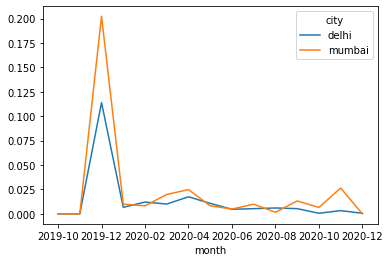

In [26]:
cm = cm[cm.index!="bangalore"]
cm = cm[cm.index!="odisha"]
cm.T.plot(legend=True)

In [30]:
broadCat = {'Animal Catcher': 'Animal',
 'Animal Husbandry': 'Animal',
 'Certificates':'other',
 'Community Infrastructure':'Infrastructure',
 'Covid 19':'covid',
 'Crime and Safety':'Crime and Safety',
 'EMP Grievance Redressal':'Grievance Redressal',
 'Electricity & Power':"Electricity",
 'Electricity and Power Supply':"Electricity",
 'Fire Pollution':"pollution",
 'Fire Safety':"Infrastructure",
 'Garbage and Unsanitary Practices':"cleanliness",
 'Lakes':"pollution",
 'Mobility - Roads, Footpaths and Infrastructure':"transport",
 'Mobility - Roads, Public transport':"transport",
 'Others':"other",
 'PWD':"Infrastructure",
 'Parks & Recreation':"lifestyle",
 'Pension':"Grievance Redressal",
 'Playgrounds':"lifestyle",
 'Pollution':"pollution",
 'Power supply':"Electricity",
 'Proibition & Sale of Tobacco products, Plastic carry bags':"pollution",
 'Public Toilets':"cleanliness",
 'Public Transport - BMTC':"transport",
 'Public Transport - KSRTC':"transport",
 'Ration Card':"Grievance Redressal",
 'Safety and Crime':"Crime and Safety",
 'Sanitation':"cleanliness",
 'Sewerage Systems':"Infrastructure",
 'Solid Waste Management':"pollution",
 'Storm Water Drains':"Infrastructure",
 'Street lighting':"Infrastructure",
 'Toilet My Right':"cleanliness",
 'Traffic and Road Safety':"transport",
 'Trees and Saplings':"Tree",
 'Water Supply':"water",
 'Water Supply Department':"water",
 'Water Supply and Services':"water"}
df["broadCategory"] = df["category"].apply(lambda x: broadCat[x])

In [35]:
cm = pd.crosstab(index=df['city'], columns=df['broadCategory'])
#cm = cm.T
cm
cm.to_csv("table.csv")

In [32]:
for col in list(cm.columns.values):
    valueList = []
    for index, row in cm.iterrows():
        value = row[col]/float(area[index])
        valueList.append(value)
    cm[col] = valueList

<AxesSubplot:xlabel='broadCategory'>

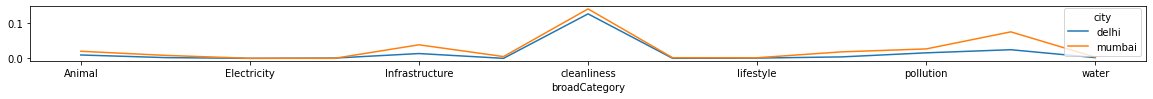

In [34]:
cm = cm[cm.index!="bangalore"]
cm = cm[cm.index!="odisha"]
cm.T.plot(legend=True, figsize=(20, 1))